     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 62.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
‚úÖ Step 1: Libraries installed and imported.

üîÑ Step 2: Loading dataset components...
   - Loading metadata from annotations.csv...


README.md:   0%|          | 0.00/959 [00:00<?, ?B/s]

annotations.csv:   0%|          | 0.00/159M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

   - Metadata loaded successfully.
   - Downloading images.zip from Hugging Face Hub...


images.zip:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

   - Image archive downloaded to: /root/.cache/huggingface/hub/datasets--balgot--stylegan3-annotated/snapshots/3bcedcafc087390b96754917951b07f31fcde589/images.zip
   - Unzipping images to 'stylegan3_images' directory...


   - Extracting :   0%|          | 0/20001 [00:00<?, ?it/s]

‚úÖ Step 2: Dataset components are ready.

üîÑ Step 3: Loading CLIP model...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 890M/890M [01:16<00:00, 12.2MiB/s]


   - Loaded CLIP ViT-L/14 on cuda.
   - Target emotion: sad
   - Quality threshold: 0.6
   - Emotion threshold: 0.55
‚úÖ Step 3: CLIP model loaded with quality filters.

üîÑ Step 4: Processing images to find sad faces with quality control...


   - Classifying:   0%|          | 0/20000 [00:00<?, ?it/s]

‚úÖ Step 4: Image processing complete.
   - 3047 images filtered out due to poor quality
   - 12105 images filtered out due to insufficient sad confidence

üìä Step 5: Results for sad faces

Processed 20000 images.
Found 4848 high-quality sad faces.

Top 10 sad faces with highest confidence:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


seed  emotion_confidence  quality_score emotion_type
3797  15448            0.997559       0.774414          sad
671    2825            0.997070       0.647949          sad
3790  15416            0.997070       0.944336          sad
2225   9029            0.996582       0.874023          sad
1369   5667            0.996094       0.875000          sad
4438  18213            0.996094       0.944336          sad
4723  19461            0.995605       0.941895          sad
206     907            0.995117       0.850098          sad
483    2037            0.995117       0.699219          sad
180     790            0.995117       0.665527          sad


üñºÔ∏è Sample of detected sad faces:
--- Seed: 15448, Sad Confidence: 0.9976, Quality: 0.7744 ---


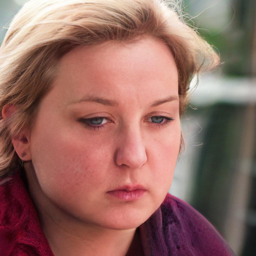

--- Seed: 2825, Sad Confidence: 0.9971, Quality: 0.6479 ---


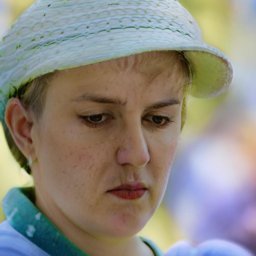

--- Seed: 15416, Sad Confidence: 0.9971, Quality: 0.9443 ---


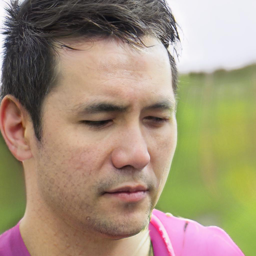

--- Seed: 9029, Sad Confidence: 0.9966, Quality: 0.8740 ---


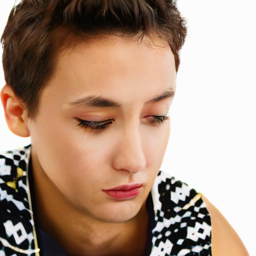

--- Seed: 5667, Sad Confidence: 0.9961, Quality: 0.8750 ---


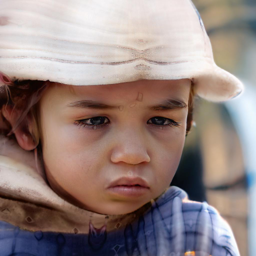

--- Seed: 18213, Sad Confidence: 0.9961, Quality: 0.9443 ---


--- Seed: 19461, Sad Confidence: 0.9956, Quality: 0.9419 ---


--- Seed: 907, Sad Confidence: 0.9951, Quality: 0.8501 ---


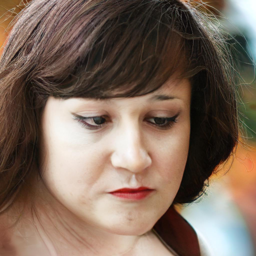


üíæ Step 6: Saving sad faces...
   - Metadata saved to sad_faces_output/sad_faces_metadata.csv
   - Uncomment the shutil section to also save image files

   - Saving 4848 individual latent vectors to: sad_faces_output/sad_vectors


KeyError: 'latent_vector'

In [1]:
#@title Isolate Sad/Less Smiling Faces with Quality Filter
# Step 1: Install and import necessary libraries
!pip install -q datasets ftfy regex tqdm openai-clip Pillow huggingface_hub
!pip install --upgrade -q Pillow

import os
import zipfile
from tqdm.auto import tqdm
import torch
import clip
from PIL import Image
import numpy as np
import pandas as pd
from datasets import load_dataset
from huggingface_hub import hf_hub_download
from IPython.display import display

print("‚úÖ Step 1: Libraries installed and imported.")

# Step 2: Load metadata and manually download & extract images
print("\nüîÑ Step 2: Loading dataset components...")

try:
    # Part A: Load ONLY the metadata from the CSV file.
    print("   - Loading metadata from annotations.csv...")
    metadata_dataset = load_dataset("balgot/stylegan3-annotated", data_files="annotations.csv", split='train')
    print("   - Metadata loaded successfully.")

    # Part B: Manually download the images.zip file.
    print("   - Downloading images.zip from Hugging Face Hub...")
    zip_path = hf_hub_download(
        repo_id="balgot/stylegan3-annotated",
        filename="images.zip",
        repo_type="dataset"
    )
    print(f"   - Image archive downloaded to: {zip_path}")

    # Part C: Extract the zip file to a known directory.
    extract_path = "stylegan3_images"
    os.makedirs(extract_path, exist_ok=True)
    print(f"   - Unzipping images to '{extract_path}' directory...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for member in tqdm(zip_ref.infolist(), desc="   - Extracting "):
            zip_ref.extract(member, extract_path)

except Exception as e:
    print(f"   - FATAL ERROR during data loading/extraction: {e}")
    exit()

print("‚úÖ Step 2: Dataset components are ready.")

# Step 3: Load the CLIP model
print("\nüîÑ Step 3: Loading CLIP model...")
device = "cuda" if torch.cuda.is_available() else "cpu"
try:
    model, preprocess = clip.load("ViT-L/14", device=device)
    print(f"   - Loaded CLIP ViT-L/14 on {device}.")
except Exception:
    print("   - Could not load ViT-L/14, falling back to ViT-B/32.")
    model, preprocess = clip.load("ViT-B/32", device=device)
    print(f"   - Loaded CLIP ViT-B/32 on {device}.")

# Define emotion categories and quality filters
emotion_prompts = {
    "sad": ["a photo of a happy face", "a photo of a sad face"],
    "melancholy": ["a photo of a cheerful face", "a photo of a melancholy face"],
    "depressed": ["a photo of a joyful face", "a photo of a depressed face"],
    "less_smiling": ["a photo of a face with a big smile", "a photo of a face with no smile"],
    "serious": ["a photo of a laughing face", "a photo of a serious face"]
}

# Quality control prompts to filter out flawed faces
quality_prompts = [
    "a high quality photo of a realistic human face",
    "a blurry, distorted, or malformed face"
]

# Choose your target emotion here
TARGET_EMOTION = "sad"  # Change this to: "sad", "melancholy", "depressed", "less_smiling", or "serious"
QUALITY_THRESHOLD = 0.6  # Minimum quality score (0-1) to include the image
EMOTION_THRESHOLD = 0.55  # Minimum confidence for target emotion

print(f"   - Target emotion: {TARGET_EMOTION}")
print(f"   - Quality threshold: {QUALITY_THRESHOLD}")
print(f"   - Emotion threshold: {EMOTION_THRESHOLD}")

# Tokenize prompts
emotion_text_prompts = emotion_prompts[TARGET_EMOTION]
emotion_tokens = clip.tokenize(emotion_text_prompts).to(device)
quality_tokens = clip.tokenize(quality_prompts).to(device)

print("‚úÖ Step 3: CLIP model loaded with quality filters.")

# Step 4: Process images and filter for target emotion with quality control
print(f"\nüîÑ Step 4: Processing images to find {TARGET_EMOTION} faces with quality control...")

target_faces_data = []
quality_filtered_count = 0
emotion_filtered_count = 0

with torch.no_grad():
    # Iterate through the metadata
    for item in tqdm(metadata_dataset, desc="   - Classifying"):
        try:
            filename = f"{str(item['seed']).zfill(5)}.jpg"
            image_path = os.path.join(extract_path, "data", "stylegan_images", filename)

            # Open the image and preprocess it
            pil_image = Image.open(image_path)
            image_tensor = preprocess(pil_image).unsqueeze(0).to(device)

            # Step 4a: Quality check
            quality_logits, _ = model(image_tensor, quality_tokens)
            quality_probs = quality_logits.softmax(dim=-1).cpu().numpy()
            quality_score = quality_probs[0][0]  # Probability of "high quality realistic face"

            if quality_score < QUALITY_THRESHOLD:
                quality_filtered_count += 1
                continue  # Skip this image due to poor quality

            # Step 4b: Emotion classification
            emotion_logits, _ = model(image_tensor, emotion_tokens)
            emotion_probs = emotion_logits.softmax(dim=-1).cpu().numpy()

            # For target emotion (index 1 in our prompts)
            emotion_prediction = np.argmax(emotion_probs)
            emotion_confidence = np.max(emotion_probs)
            target_emotion_score = emotion_probs[0][1]  # Probability of target emotion

            # If the model predicted the target emotion with sufficient confidence
            if emotion_prediction == 1 and target_emotion_score >= EMOTION_THRESHOLD:
                target_faces_data.append({
                    'full_path': image_path,
                    'seed': item['seed'],
                    'emotion_confidence': target_emotion_score,
                    'quality_score': quality_score,
                    'original_caption': item['text'],
                    'emotion_type': TARGET_EMOTION
                })
            else:
                emotion_filtered_count += 1

        except FileNotFoundError:
            print(f"   - CRITICAL: Image file not found at {image_path}. Skipping.")
        except Exception as e:
            print(f"   - Warning: Could not process {image_path}. Error: {e}. Skipping.")

print(f"‚úÖ Step 4: Image processing complete.")
print(f"   - {quality_filtered_count} images filtered out due to poor quality")
print(f"   - {emotion_filtered_count} images filtered out due to insufficient {TARGET_EMOTION} confidence")

# Step 5: Display the results
print(f"\nüìä Step 5: Results for {TARGET_EMOTION} faces")

df_target_emotion = pd.DataFrame(target_faces_data)

print(f"\nProcessed {len(metadata_dataset)} images.")
print(f"Found {len(df_target_emotion)} high-quality {TARGET_EMOTION} faces.")

if not df_target_emotion.empty:
    # Sort by emotion confidence (highest first)
    df_sorted = df_target_emotion.sort_values(by='emotion_confidence', ascending=False)

    print(f"\nTop 10 {TARGET_EMOTION} faces with highest confidence:")
    display(df_sorted[['seed', 'emotion_confidence', 'quality_score', 'emotion_type']].head(10))

    print(f"\nüñºÔ∏è Sample of detected {TARGET_EMOTION} faces:")
    num_samples_to_show = min(len(df_target_emotion), 8)
    sample_df = df_sorted.head(num_samples_to_show)

    for index, row in sample_df.iterrows():
        print(f"--- Seed: {row['seed']}, {TARGET_EMOTION.title()} Confidence: {row['emotion_confidence']:.4f}, Quality: {row['quality_score']:.4f} ---")
        img = Image.open(row['full_path'])
        img.thumbnail((256, 256))
        display(img)

    # Step 6: Save the results (optional)
    print(f"\nüíæ Step 6: Saving {TARGET_EMOTION} faces...")

    # Create output directory
    output_dir = f"{TARGET_EMOTION}_faces_output"
    os.makedirs(output_dir, exist_ok=True)

    # Save metadata
    df_sorted.to_csv(os.path.join(output_dir, f"{TARGET_EMOTION}_faces_metadata.csv"), index=False)

    # Copy top images (optional - uncomment to save actual image files)
    # import shutil
    # top_n = min(50, len(df_sorted))  # Save top 50 or all if less
    # for index, row in df_sorted.head(top_n).iterrows():
    #     dest_filename = f"{TARGET_EMOTION}_{row['seed']}_conf{row['emotion_confidence']:.3f}_qual{row['quality_score']:.3f}.jpg"
    #     dest_path = os.path.join(output_dir, dest_filename)
    #     shutil.copy2(row['full_path'], dest_path)

    print(f"   - Metadata saved to {output_dir}/{TARGET_EMOTION}_faces_metadata.csv")
    print(f"   - Uncomment the shutil section to also save image files")

else:
    print(f"\nNo {TARGET_EMOTION} faces were detected with the current settings.")
    print("Try lowering EMOTION_THRESHOLD or QUALITY_THRESHOLD values.")

# --- Sauvegarde des vecteurs latents ---
vectors_dir = os.path.join(output_dir, f"{TARGET_EMOTION}_vectors")
os.makedirs(vectors_dir, exist_ok=True)

print(f"\n   - Saving {len(df_sorted)} individual latent vectors to: {vectors_dir}")

for index, row in df_sorted.iterrows():
    # Le vecteur est une liste ou un array dans le DataFrame
    latent_vector = np.array(row['latent_vector'])
    seed = row['seed']
    vector_filename = f"{str(seed).zfill(5)}.npy"
    np.save(os.path.join(vectors_dir, vector_filename), latent_vector)

print(f"   - Latent vectors saved successfully in {vectors_dir}")

In [4]:
import pandas as pd
from datasets import load_dataset # Utilis√© uniquement pour hf_hub_download
import numpy as np
import os
from tqdm.auto import tqdm
from huggingface_hub import hf_hub_download
import ast # Pour convertir les cha√Ænes de caract√®res en listes Python

# --- Configuration ---
# 1. Chemin vers le fichier CSV g√©n√©r√© par le premier script (qui contient les seeds des images s√©lectionn√©es)
METADATA_CSV_PATH = "sad_faces_output/sad_faces_metadata.csv"

# 2. Dossier o√π les fichiers de vecteurs .npy seront sauvegard√©s
VECTORS_OUTPUT_DIR = "sad_faces_output/sad_vectors"

# 3. Nom de la colonne contenant les "seeds" dans votre CSV (normalement 'seed')
SEED_COLUMN_NAME = 'seed'

print(f"Fichier CSV d'entr√©e : {METADATA_CSV_PATH}")
print(f"Dossier de sortie pour les vecteurs : {VECTORS_OUTPUT_DIR}")

# Cr√©er le dossier de sortie s'il n'existe pas
os.makedirs(VECTORS_OUTPUT_DIR, exist_ok=True)


# --- √âtape 1: Charger les donn√©es n√©cessaires ---
print("\nüîÑ √âtape 1: Chargement des donn√©es...")

# Charger le CSV contenant les seeds des visages que nous avons s√©lectionn√©s
try:
    selected_faces_df = pd.read_csv(METADATA_CSV_PATH)
    print(f"   ‚úÖ {len(selected_faces_df)} visages s√©lectionn√©s charg√©s depuis le CSV.")
except FileNotFoundError:
    print(f"   ‚ùå ERREUR: Le fichier '{METADATA_CSV_PATH}' est introuvable.")
    print("   Veuillez vous assurer que le premier script a bien √©t√© ex√©cut√© et que le chemin est correct.")
    exit()

# Plut√¥t que de charger le dataset complet via datasets.load_dataset (qui causait le CastError),
# nous allons t√©l√©charger sp√©cifiquement annotations.csv et le lire avec pandas.
print("   - T√©l√©chargement et chargement de 'annotations.csv' pour acc√©der aux vecteurs latents...")
try:
    # T√©l√©charger annotations.csv depuis Hugging Face Hub
    annotations_csv_path = hf_hub_download(
        repo_id="balgot/stylegan3-annotated",
        filename="annotations.csv",
        repo_type="dataset"
    )
    print(f"   - annotations.csv t√©l√©charg√© localement √† : {annotations_csv_path}")

    # Charger annotations.csv avec pandas
    # La colonne 'w' contient des cha√Ænes de caract√®res repr√©sentant des listes de nombres.
    # Nous devons les convertir en vraies listes Python, puis en NumPy arrays.
    full_annotations_df = pd.read_csv(annotations_csv_path)

    # V√©rifier si la colonne 'w' existe, sinon 'vector' (selon l'erreur que tu as eue)
    vector_column = None
    if 'w' in full_annotations_df.columns:
        vector_column = 'w'
    elif 'vector' in full_annotations_df.columns:
        vector_column = 'vector'

    if vector_column is None:
        print(f"   ‚ùå ERREUR: Aucune colonne 'w' ou 'vector' trouv√©e dans '{annotations_csv_path}'.")
        print(f"   Colonnes disponibles: {full_annotations_df.columns.tolist()}")
        exit()

    print(f"   - Conversion de la colonne '{vector_column}' (vecteurs latents) de string √† numpy array...")
    # Appliquer ast.literal_eval pour convertir la cha√Æne en liste, puis np.array pour convertir la liste en array NumPy
    full_annotations_df[vector_column] = full_annotations_df[vector_column].apply(ast.literal_eval).apply(np.array)

    print("   ‚úÖ annotations.csv charg√© et trait√© avec succ√®s.")

except Exception as e:
    print(f"   ‚ùå ERREUR lors du chargement ou du traitement de annotations.csv: {e}")
    exit()


# --- √âtape 2: Cr√©er une map de recherche rapide pour les vecteurs ---
print("\nüîÑ √âtape 2: Cr√©ation d'une table de correspondance (seed -> vecteur)...")
# Utilisation directe du DataFrame pandas pour cr√©er la map {seed: vector_array}
vector_lookup_map = pd.Series(full_annotations_df[vector_column].values, index=full_annotations_df['seed']).to_dict()
print(f"   ‚úÖ Map de correspondance cr√©√©e avec {len(vector_lookup_map)} entr√©es.")


# --- √âtape 3: Extraire et sauvegarder les vecteurs correspondants ---
print(f"\nüîÑ √âtape 3: Extraction et sauvegarde des {len(selected_faces_df)} vecteurs latents...")

saved_count = 0
not_found_count = 0

# On parcourt maintenant le DataFrame des visages s√©lectionn√©s (issu de sad_faces_metadata.csv)
for seed in tqdm(selected_faces_df[SEED_COLUMN_NAME], desc="   - Sauvegarde des vecteurs"):
    # On utilise notre map pour une recherche instantan√©e du vecteur correspondant au seed
    if seed in vector_lookup_map:
        latent_vector_array = vector_lookup_map[seed]

        # D√©finir le nom du fichier de sortie (ex: 01234.npy)
        output_filename = f"{str(seed).zfill(5)}.npy"
        output_path = os.path.join(VECTORS_OUTPUT_DIR, output_filename)

        # Sauvegarder le vecteur dans le fichier .npy
        np.save(output_path, latent_vector_array)
        saved_count += 1
    else:
        print(f"   ‚ö†Ô∏è Attention: Le seed {seed} du CSV des visages s√©lectionn√©s n'a pas √©t√© trouv√© dans le fichier annotations.csv complet. Ignor√©.")
        not_found_count += 1

# --- Rapport Final ---
print("\nüéâ Op√©ration termin√©e !")
print(f"   - {saved_count} vecteurs latents ont √©t√© sauvegard√©s avec succ√®s dans '{VECTORS_OUTPUT_DIR}'.")
if not_found_count > 0:
    print(f"   - {not_found_count} seeds n'ont pas pu √™tre trouv√©s (ce qui est inhabituel si votre CSV est coh√©rent avec le dataset original).")

Fichier CSV d'entr√©e : sad_faces_output/sad_faces_metadata.csv
Dossier de sortie pour les vecteurs : sad_faces_output/sad_vectors

üîÑ √âtape 1: Chargement des donn√©es...
   ‚úÖ 4848 visages s√©lectionn√©s charg√©s depuis le CSV.
   - T√©l√©chargement et chargement de 'annotations.csv' pour acc√©der aux vecteurs latents...
   - annotations.csv t√©l√©charg√© localement √† : /root/.cache/huggingface/hub/datasets--balgot--stylegan3-annotated/snapshots/3bcedcafc087390b96754917951b07f31fcde589/annotations.csv
   - Conversion de la colonne 'vector' (vecteurs latents) de string √† numpy array...
   ‚ùå ERREUR lors du chargement ou du traitement de annotations.csv: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

üîÑ √âtape 2: Cr√©ation d'une table de correspondance (seed -> vecteur)...
   ‚úÖ Map de correspondance cr√©√©e avec 20000 entr√©es.

üîÑ √âtape 3: Extraction et sauvegarde des 4848 vecteurs latents...


   - Sauvegarde des vecteurs:   0%|          | 0/4848 [00:00<?, ?it/s]


üéâ Op√©ration termin√©e !
   - 4848 vecteurs latents ont √©t√© sauvegard√©s avec succ√®s dans 'sad_faces_output/sad_vectors'.


In [4]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import os
from tqdm.auto import tqdm

# --- Configuration ---
METADATA_CSV_PATH = "sad_faces_output/sad_faces_metadata.csv"
VECTORS_OUTPUT_DIR = "sad_faces_output/sad_vectors"
SEED_COLUMN_NAME = 'seed'

print(f"Fichier CSV d'entr√©e : {METADATA_CSV_PATH}")
print(f"Dossier de sortie pour les vecteurs : {VECTORS_OUTPUT_DIR}")

os.makedirs(VECTORS_OUTPUT_DIR, exist_ok=True)

# --- √âtape 1: Chargement des donn√©es n√©cessaires ---
print("\nüîÑ √âtape 1: Chargement des donn√©es...")
try:
    selected_faces_df = pd.read_csv(METADATA_CSV_PATH)
    print(f"   ‚úÖ {len(selected_faces_df)} visages s√©lectionn√©s charg√©s depuis le CSV.")
except FileNotFoundError:
    print(f"   ‚ùå ERREUR: Le fichier '{METADATA_CSV_PATH}' est introuvable.")
    exit()

print("   - Chargement du fichier 'annotations.csv' de 'balgot/stylegan3-annotated'...")
full_dataset = load_dataset(
    "balgot/stylegan3-annotated",
    data_files="annotations.csv",
    split='train'
)
print("   ‚úÖ Dataset complet (m√©tadonn√©es uniquement) charg√©.")

# --- √âtape 2: Cr√©er une map de recherche rapide pour les vecteurs ---
print("\nüîÑ √âtape 2: Cr√©ation d'une table de correspondance (seed -> vecteur)...")
vector_lookup_map = {}
VECTOR_COLUMN_NAME_IN_DATASET = 'vector'

for item in tqdm(full_dataset, desc="   - Construction de la map"):
    vector_lookup_map[item['seed']] = item[VECTOR_COLUMN_NAME_IN_DATASET]
print(f"   ‚úÖ Map de correspondance cr√©√©e avec {len(vector_lookup_map)} entr√©es.")

# --- √âtape 3: Extraire et sauvegarder les vecteurs correspondants ---
print(f"\nüîÑ √âtape 3: Extraction et sauvegarde des {len(selected_faces_df)} vecteurs latents...")

saved_count = 0
error_count = 0

for seed in tqdm(selected_faces_df[SEED_COLUMN_NAME], desc="   - Sauvegarde des vecteurs"):
    if seed in vector_lookup_map:
        latent_vector_string = vector_lookup_map[seed]

        try:
            cleaned_string = latent_vector_string.strip('[] \n\t')

            # Cr√©er le tableau 1D initial
            vector_array = np.array(cleaned_string.split(), dtype=np.float32)

            # --- CORRECTION DE LA FORME (SHAPE) ---
            # Standardiser le format du vecteur en (1, 512)
            standardized_vector = vector_array.reshape(1, -1)

            # V√©rifier que le format est correct et que le vecteur n'est pas vide
            if standardized_vector.shape != (1, 512):
                 raise ValueError(f"Format incorrect apr√®s reshape : {standardized_vector.shape}")

            output_filename = f"{str(seed).zfill(5)}.npy"
            output_path = os.path.join(VECTORS_OUTPUT_DIR, output_filename)

            # Sauvegarder le vecteur standardis√© au format binaire
            np.save(output_path, standardized_vector)
            saved_count += 1

        except (ValueError, TypeError) as e:
            error_count += 1

    else:
        error_count += 1

# --- Rapport Final ---
print("\nüéâ Op√©ration termin√©e !")
print(f"   - {saved_count} vecteurs latents ont √©t√© sauvegard√©s avec succ√®s dans '{VECTORS_OUTPUT_DIR}'.")
print(f"   - Tous les vecteurs ont √©t√© format√©s avec la forme (1, 512).")
if error_count > 0:
    print(f"   - {error_count} vecteurs n'ont pas pu √™tre trait√©s √† cause d'une erreur de format ou d'un seed manquant.")

Fichier CSV d'entr√©e : sad_faces_output/sad_faces_metadata.csv
Dossier de sortie pour les vecteurs : sad_faces_output/sad_vectors

üîÑ √âtape 1: Chargement des donn√©es...
   ‚úÖ 4848 visages s√©lectionn√©s charg√©s depuis le CSV.
   - Chargement du fichier 'annotations.csv' de 'balgot/stylegan3-annotated'...
   ‚úÖ Dataset complet (m√©tadonn√©es uniquement) charg√©.

üîÑ √âtape 2: Cr√©ation d'une table de correspondance (seed -> vecteur)...


   - Construction de la map:   0%|          | 0/20000 [00:00<?, ?it/s]

   ‚úÖ Map de correspondance cr√©√©e avec 20000 entr√©es.

üîÑ √âtape 3: Extraction et sauvegarde des 4848 vecteurs latents...


   - Sauvegarde des vecteurs:   0%|          | 0/4848 [00:00<?, ?it/s]


üéâ Op√©ration termin√©e !
   - 4848 vecteurs latents ont √©t√© sauvegard√©s avec succ√®s dans 'sad_faces_output/sad_vectors'.
   - Tous les vecteurs ont √©t√© format√©s avec la forme (1, 512).


In [5]:
import numpy as np

vector = np.load('/content/sad_faces_output/sad_vectors/00011.npy')

print(f"Forme du tableau: {vector.shape}") # Devrait afficher: (1, 512)

Forme du tableau: (1, 512)


In [4]:
import pandas as pd
import os

# Load the CSV file
file_path = '/content/data.csv'
df = pd.read_csv(file_path)

# Get the original column name (header)
first_column_name = df.columns[0]

# Process each cell in the first column (skip the header at index 0)
for i in range(0, len(df)):
    current_value = df.iloc[i, 0]

    # Remove the path prefix "stylegan3_images/data/stylegan_images/"
    if "stylegan3_images/data/stylegan_images/" in str(current_value):
        cleaned_value = str(current_value).replace("stylegan3_images/data/stylegan_images/", "")
    else:
        cleaned_value = str(current_value)

    # Remove the ".jpg" extension
    if cleaned_value.endswith(".jpg"):
        cleaned_value = cleaned_value[:-4]  # Remove last 4 characters (.jpg)

    # Update the cell with the cleaned value
    df.iloc[i, 0] = cleaned_value

# Save the modified DataFrame back to the same file
df.to_csv(file_path, index=False)

print("CSV file has been successfully updated!")
print(f"First column header: '{first_column_name}'")
print("Sample of cleaned first column values:")
print(df.iloc[1:6, 0].tolist())  # Show first 5 data rows

CSV file has been successfully updated!
First column header: 'full_path'
Sample of cleaned first column values:
['02825', '15416', '09029', '05667', '18213']


In [7]:
import os
import shutil
from google.colab import files

folder_to_zip = "/content/sad_faces_output/sad_vectors"

zip_filename = "sad_vectors.zip"
zip_output_path = os.path.join("/content/sad_faces_vec", zip_filename)

print(f"üìÅ Zipping folder: {folder_to_zip}")
print(f"üíæ Saving archive to: {zip_output_path}")

# shutil.make_archive is a high-level utility that makes this easy.
# It takes the base name of the archive, the format ('zip'), and the root directory to archive.
try:
    shutil.make_archive(
        base_name=os.path.splitext(zip_output_path)[0], # Path without the .zip extension
        format='zip',
        root_dir=folder_to_zip
    )
    print("\n‚úÖ Zipping complete!")

    print(f"\n‚¨áÔ∏è Starting download for: {zip_output_path}")
    print("   Please wait for the file to be prepared and the browser download to start.")
    files.download(zip_output_path)

except FileNotFoundError:
    print(f"\n‚ùå ERROR: The directory '{folder_to_zip}' was not found.")
    print("   Please make sure your previous script ran correctly and created this folder.")
except Exception as e:
    print(f"\n‚ùå An unexpected error occurred: {e}")

üìÅ Zipping folder: /content/sad_faces_output/sad_vectors
üíæ Saving archive to: /content/sad_faces_vec/sad_vectors.zip

‚úÖ Zipping complete!

‚¨áÔ∏è Starting download for: /content/sad_faces_vec/sad_vectors.zip
   Please wait for the file to be prepared and the browser download to start.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>